Neuromorphic engineering I

## Lab 3: Subthreshold Behavior of Transistors

Group number: 18

Team member 1: Alessandro Pasini

Team member 2: Quillan Favey


Date:  04.11.2022


-------------------------------------------------------------------------------------------------------------------

In this lab exercise we will be investigating the subthreshold (weak inversion) behavior of
isolated _p_-- and _n_--channel MOSFETs. Specifically, we will

* measure the currents through the transistors as a function of their gate and source voltages
* determine how effective these terminals are at changing the current
* compare the characteristics of p and n-fet devices.


# 1. Prelab #

Make sure you have studied the lecture material
before attempting this prelab. The questions will also make much
more sense if you read through the entire lab handout first.  _You are
required to complete this prelab before you can begin taking data._


## 1.1 n- and p-fets, in an _n_ well Process

A vertical section through the silicon with both n and p-fet transistors is shown in Figure 1.
The class chip has a p-type substrate (like almost all chips nowadays) and both p- and n-wells.  
The p-wells (not shown in the figure) are shorted to the p-substrate because the doping is of the same type.   

Because we are grounding the substrate and we are connecting _n_--well to the power supply, $V_{dd}$ is positive.
This positive voltage reverse biases the junction between the _n_--wells (which are tied to $V_{dd}$) and the substrate (which is tied to gnd).

For this process, $V_{dd}$=1.8 V.


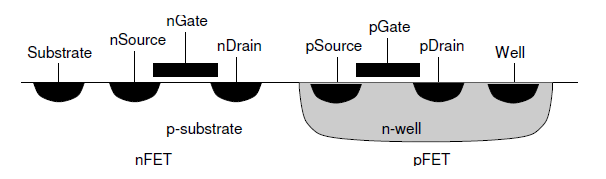

<h4><center> Figure 1: a cross section through p-substrate chip. </center></h4>

For the following questions assume an _n_--well process -- unless stated otherwise.

**1.** Draw four-terminal symbols for native and well transistors and label all the terminals; use _d_ for drain, _s_ for source, _g_ for gate, _b_ for bulk, and _w_ for well.
Indicate the direction of current flow that is consistent with your choice of drain and source (you can drag the * .png file into the cell below).

![](2022-10-04-14-40-25.png)

**2.** Write the expressions for the subthreshold (weak inversion) current $I_{ds}$ for both types of
transistors.

* For n-fet: $I=I_{0}e^{\kappa V_{g}/U_{T}}(e^{-V_{s}/U_{T}-e^{-V_{d}/U_{T}}})$
* For p-fet: $I=I_{0}e^{-\kappa V_{g}/U_{T}}(e^{V_{s}/U_{T}-e^{V_{d}/U_{T}}})$

**3.** Write the expressions for the _saturation_ current of these
transistors, that is, the value of the current when $V_{ds}\gg\frac{4kT}{q}$.
For the remaining questions you may assume that the transistor is in
saturation.

* For n-fet: $I=I_{f}=I_{0}e^{(\kappa V_{g}-V_{s})/U_{T}}$
* For p-fet: $I=I_{f}=I_{0}e^{(-\kappa V_{g}+V_{s})/U_{T}}$

**4.** For both transistors, write an expression for source voltage as a function of gate voltage if the channel current is constant and the transistor is in saturation. In each case, what is $\frac{\mathrm{d}V_s}{\mathrm{d}V_g}$?

* For n-fet: $V_{s}=\kappa V_{g} - \ln(\frac{I}{I_{0}})\frac{1}{U_{T}}$
* For p-fet: $V_{s}=\kappa V_{g} + \ln(\frac{I}{I_{0}})\frac{1}{U_{T}}$

Taking the derivative for each expression with respect to $V_{g}$, we get: $\frac{dV_{s}}{dV_{g}}=\kappa$

## 1.2 ESD protection of CMOS Chips (need to know)

All MOSFET chips are _extremely_ prone to damage by static electricity.
The current through the transistors is controlled by an insulated
gate.  

Not so fun facts: **Even a few tens of volts can blow up the gate. A short walk
across the room can build up kilovolts of static potential.**

There are electrostatic discharge (ESD) protection structures on the chip inputs
that are designed to leak off the static charge before it can damage
the chip, but often this will not be enough.  

There are two simple precautions that can definitely keep the chip safe.

**1. When the chip is not powered up in a socket, keep it stuck
into a piece of black conductive foam.** This will short all the pins together. 

**2. Always ground yourself to chassis (potbox) ground before picking up
or touching a chip.** This will discharge the static charge.


## 1.3 Experiments and Lab Reports

For the following experiments, include in your lab reports, graphs of all theoretical and experimental curves.  Experimental data should be plotted in a point style so that individual data points are visible.
Make sure you take enough data points and label your axes.
The theoretical fit should be graphed on the same plot in a line style.

Your written interpretation of the results and any anomalies are essential.
Please do not just hand in the plots without any interpretation on your part. 
Your report does not need to be beautiful, but it should show that you understand what you are measuring.

Remember that the purpose of this lab is to investigate _subthreshold_ transistor characteristics. Therefore, all voltage sweeps should span the measurable subthreshold regime while extending just far enough above threshold to show where the threshold is.

Avoid these common mistakes in your report:

- **Not discussing your data sufficiently.** Think about a publication. The readers want to understand your reasoning with you. They want to be able to reproduce your results.
- **Not using cross-hair axes when 0,0 is relevant.** Use grid on to turn on grid, which will draw dotted lines from major ticks. See fontsize to make spacing readable.
- **Forgetting to mention what your plot shows.**
- **Not labeling your figures with a caption,** e.g., “Fig. 1: Transistor drain current vs. gate voltage, Experiment 1.”
- **Insufficiently annotating your data.** It's OK to draw on your plots to indicate the slope of the curve, or the x / y intercepts.
- **Using identical markers for all plots.** Your curves must be distinguishable when printed in black and white. Use e.g. plot(v,i,'o-',v,i2,'s-'), which labels one curve with circle markers and the other with square markers.
- **Forgetting units on measurements,** e.g. “our conductance is 1.000653e-10”. What are the units?
- **Giving your measurements too many digits of precision;** see previous error. Do your instruments really give you 7 digits of precision?


# 2 Set up the experiment

## 2.1 Connect the device

In [1]:
# import the necessary library to communicate with the hardware
import pyplane
import time
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# create a Plane object and open the communication
if 'p' not in locals():
    p = pyplane.Plane()
    try:
        p.open('/dev/ttyACM0') # Open the USB device ttyACM0 (the board). 
    except RuntimeError as e:
        print(e)
        
# Note that if you plug out and plug in the USB device in a short time interval, the operating system might allocate a new name like ttyACM1, 
# then you may get error messages with open(...ttyACM0). So please avoid frenquently plugging in/out the board.

In [3]:
p.get_firmware_version()

(1, 8, 6)

In [3]:
# Send a reset signal to the board, check if the LED blinks
p.reset(pyplane.ResetType.Soft)

time.sleep(1) 
# NOTE: You must send this request events every time you do a reset operetion, otherwise the recieved data is noisy.
# Because the class chip need to do handshake to get the communication correct.
p.request_events(1)

In [6]:
# Try to read something, make sure the chip responses
p.read_current(pyplane.AdcChannel.GO0_N)

1.4501952705359145e-07

In [6]:
# If any of the above steps fail, delete the object, and restart the kernel

# del p

## 2.2 Recommendations to this lab

* You do not need to follow the order, it is actually better to do all the measurement of one device together, e.g. 3.1 -> 4.1 -> 3.2 -> 4.2

* **Please save the data as frequent as possible and use the loaded data for processing**

# 3 Current as a Function of Gate Voltage

## 3.1 N-FET
For the N-FET device on the CoACH chip, measure current $I_{ds}$ as a function of gate voltage $V_g$ for fixed source, bulk (substrate or well), and drain voltages.

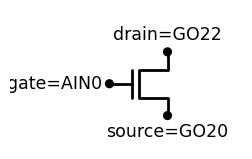

In [7]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

Hint: To cancel out the leakage current and shunt resistance (recall lab1), you may want to do a subtraction

$I_{ds} = I_{GO20} - I_{GO20}|_{V_g = 0}$ 

* You have to set the input voltage demultiplexer by sending a configuration event:

In [5]:
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

**Make sure the chip receives the event by a blink of LED1, if it's not the case, the chip is dead and you must replug it.**

* What will be the fixed value for source, bulk (substrate or well), and drain voltages?

In [9]:
# set source voltage
vs_n = 0
p.set_voltage(pyplane.DacChannel.GO20,vs_n)       
print("The source voltage is set to {} V".format(vs_n))

The source voltage is set to 0 V


In [27]:
# set drain voltage
vd_n = 1.8
p.set_voltage(pyplane.DacChannel.GO22, vd_n)
print("The drain voltage is set to {} V".format(vd_n))

The drain voltage is set to 1.8 V


In [11]:
#get leakage current
vg_leakage = 0
p.set_voltage(pyplane.DacChannel.AIN0, vg_leakage)
print("The trial gate voltage is set to {} V".format(vg_leakage))
leakage = p.read_current(pyplane.AdcChannel.GO20_N)
print("Leakage current is {} A".format(leakage))

The trial gate voltage is set to 0 V
Leakage current is 2.4414064103694955e-09 A


In [28]:
# set trial gate voltage
vg_n = 1.8
p.set_voltage(pyplane.DacChannel.AIN0, vg_n)
print("The trial gate voltage is set to {} V".format(vg_n))

The trial gate voltage is set to 1.8 V


In [29]:
# read Ids, from *Source* --> NOTE THAT THE ADC CHANNEL PIN CHANGES THE NAME FOR THE SOURCE
ids_n = p.read_current(pyplane.AdcChannel.GO20_N)
print("Ids is {} A".format(ids_n))

Ids is 9.98779228211788e-07 A


* Data aquisition

In [30]:
# sweep gate voltage
import numpy as np
Ids_sweep = []
V_sweep = np.arange(0,1.8,0.01)
for voltage in V_sweep:
    #set voltage
    p.set_voltage(pyplane.DacChannel.AIN0, voltage)
    #print("The gate voltage is set to {} V".format(voltage))
    time.sleep(0.05)
    Ids_sweep.append(p.read_current(pyplane.AdcChannel.GO20_N)-leakage)


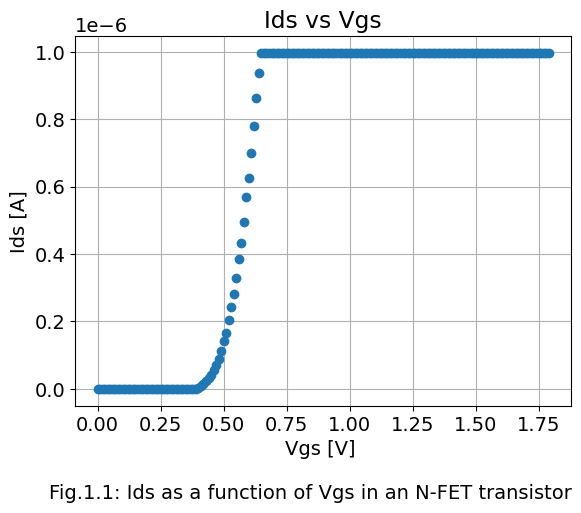

In [31]:
# plot in linear scale 
plt.rcParams.update({'font.size': 14})
plt.plot(V_sweep,Ids_sweep,"o")
plt.xlabel('''Vgs [V] 

        Fig.1.1: Ids as a function of Vgs in an N-FET transistor            ''')
plt.ylabel('Ids [A]')
plt.title("Ids vs Vgs")
#plt.legend()
plt.grid()
plt.show()


In [32]:
# if it looks nice in the plot, save it!

#plt.savefig("TP_2_plot_3_1")
data = [Ids_sweep,V_sweep]
np.savetxt('TP_2_data_3_1.csv',data, delimiter = ',')


In [33]:
# Load data you saved and plot, to check if the data is saved correctly
y,x = np.loadtxt('TP_2_data_3_1.csv',delimiter=',')

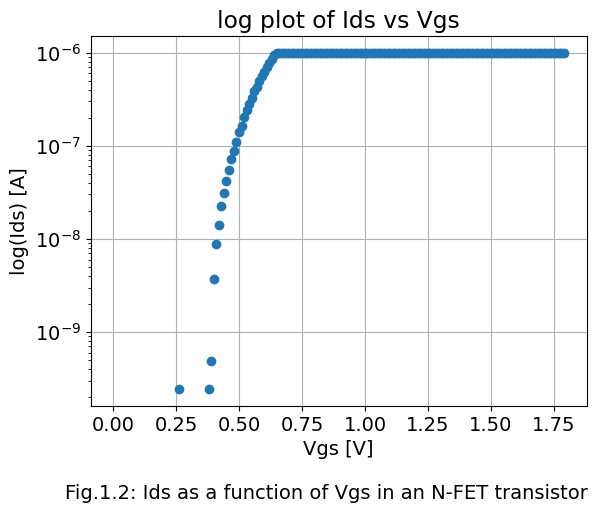

In [34]:
# plot in logarithmic scale
plt.plot(x,y,"o")
plt.xlabel('''Vgs [V]

        Fig.1.2: Ids as a function of Vgs in an N-FET transistor            ''')
plt.ylabel('log(Ids) [A]')
plt.title("log plot of Ids vs Vgs")
plt.semilogy()
plt.grid()
plt.show()

[0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59] [4.15039032e-08 5.54199218e-08 7.15332049e-08 8.83789013e-08
 1.11328117e-07 1.40869137e-07 1.65039059e-07 2.03369130e-07
 2.43164057e-07 2.80517573e-07 3.29345700e-07 3.85253902e-07
 4.32617203e-07 4.95361310e-07 5.67871116e-07]


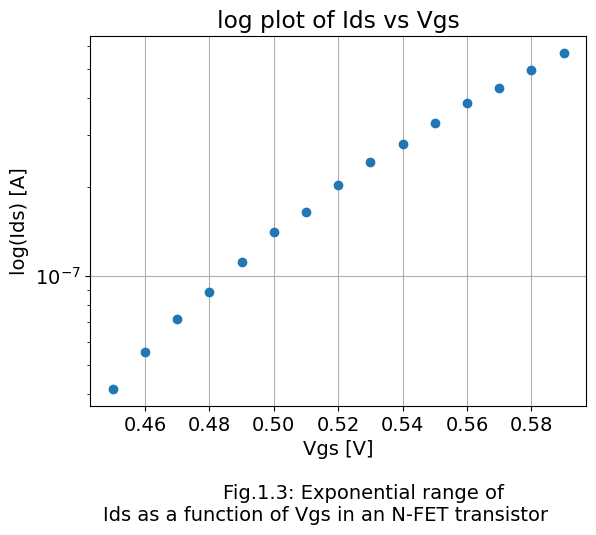

In [35]:
# extract the valid range and plot in logarithmic scale
valid_y = y[45:60]
valid_x = x[45:60]
print(valid_x,valid_y)
#print(np.log10(valid_y))
plt.plot(valid_x,valid_y,"o")
plt.xlabel('''Vgs [V]

        Fig.1.3: Exponential range of
        Ids as a function of Vgs in an N-FET transistor            ''')
plt.ylabel('log(Ids) [A]')
plt.title("log plot of Ids vs Vgs")
plt.semilogy()
plt.grid()
plt.show()


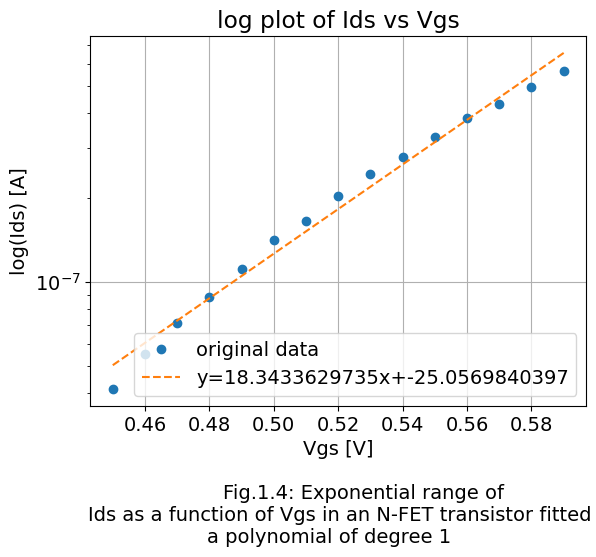

In [36]:
# fit in the valid range (you may want to add the fitted line in the plot)
m, b = np.polyfit(valid_x,np.log(valid_y),deg=1)
# compare the orignial data points and the fitted line
fitted_line = [m * i + b for i in valid_x]

plt.plot(valid_x,valid_y,"o",label='original data')
plt.plot(valid_x,np.exp(fitted_line),"--",label=f'y={np.around(m,10)}x+{np.around(b,10)}')
plt.xlabel('''Vgs [V]

        Fig.1.4: Exponential range of
        Ids as a function of Vgs in an N-FET transistor fitted with
        a polynomial of degree 1           ''')
plt.ylabel('log(Ids) [A]')
plt.title("log plot of Ids vs Vgs")
plt.legend()
plt.semilogy()
plt.grid()
plt.show()

* Extract $I_0$ and $\kappa$

In [37]:
# I_0
#write equations...
print(f"I_0 = {b}")

I_0 = -25.056984039712983


In [38]:
# kappa

print(f"kappa = {m}")

kappa = 18.343362973491132


* Extract the threshold voltage and the current at threshold, using the definition given
in class: $I_{ds}$ is half of the extrapolated subthreshold current.

In [23]:
# compute threshold voltage
from scipy import interpolate
f = interpolate.interp1d(valid_x, np.log(valid_y))
xnew = np.arange(valid_x[45],valid_x[60],0.01)
ynew = f(xnew)



IndexError: index 45 is out of bounds for axis 0 with size 15

In [ ]:
# compute Ids at threshold voltage
I_interp = interpolate.interp1d(..., ...)
I_interp(...)

## 3.2 P-FET 

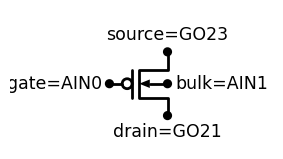

In [ ]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

Hint: To cancel out the leakage current and shunt resistance, you may want to do a subtraction:

$I_{ds} = I_{GO21} - I_{GO21}|_{V_g = 0}$

* You have to choose the input voltage demultiplexer by sending a configuration event (make sure LED1 blinks):

In [4]:
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine1, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

**Make sure the chip receives the event by a blink of LED1, if it's not the case, the chip is dead and you must replug it.**

* What will be the fixed source, bulk (substrate or well), and drain voltages?

In [5]:
# set bulk voltage (to Vdd for p-fets)
vb_p = 1.8
p.set_voltage(pyplane.DacChannel.AIN1, vb_p)
print("The bulk voltage is set to {} V".format(p.get_set_voltage(pyplane.DacChannel.AIN1)))

The bulk voltage is set to 1.7982406616210938 V


In [6]:
# set source voltage
vs_p = 1.8
p.set_voltage(pyplane.DacChannel.GO23, vs_p)
print("The source voltage is set to {} V".format(p.get_set_voltage(pyplane.DacChannel.GO23)))

The source voltage is set to 1.7982406616210938 V


In [7]:
# set drain voltage
vd_p = 0
p.set_voltage(pyplane.DacChannel.GO21, vd_p)
print("The drain voltage is set to {} V".format(p.get_set_voltage(pyplane.DacChannel.GO21)))

The drain voltage is set to 0.0 V


In [8]:
# set trial gate voltage
vg_p = 1.8
p.set_voltage(pyplane.DacChannel.AIN0, vg_p)
print("The gate voltage is set to {} V".format(p.get_set_voltage(pyplane.DacChannel.AIN0)))

The gate voltage is set to 1.7982406616210938 V


In [9]:
# read Ids 
ids_p = p.read_current(pyplane.AdcChannel.GO21_N)
print("Ids is {} A".format(ids_p))

Ids is 8.544922103226327e-09 A


* Data aquisition

In [10]:
# sweep gate voltage 
import numpy as np
Ids_sweep_p = []
V_sweep_p = np.arange(0,1.8,0.01)
for voltage in V_sweep_p:
    #set voltage
    p.set_voltage(pyplane.DacChannel.AIN0, voltage)
    #print("The gate voltage is set to {} V".format(voltage))
    time.sleep(0.05)
    Ids_sweep_p.append(p.read_current(pyplane.AdcChannel.GO21_N)-ids_p)


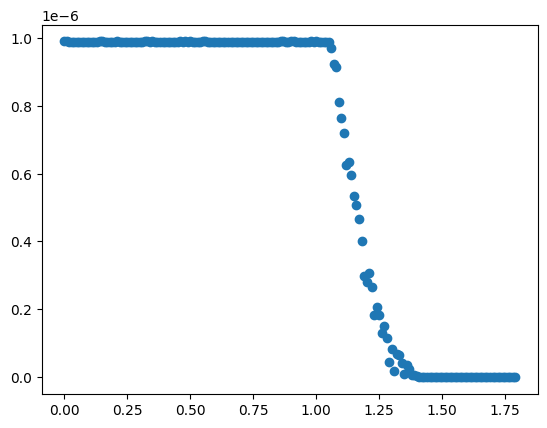

In [12]:
# plot in linear scale
plt.plot(V_sweep_p,Ids_sweep_p,"o")

In [13]:
# if it looks nice in the plot, save it!
data = [Ids_sweep_p,V_sweep_p]
np.savetxt("pfet31.csv",data,delimiter=",")

In [ ]:
# Load data you saved and plot, to check if the data is saved correctly


In [ ]:
# plot in logarithmic scale

In [ ]:
# extract the valid range and plot in logarithmic scale

In [ ]:
# fit in the valid range (you may want to add the fitted line in the plot)


Extract $I_0$ and $\kappa$

In [ ]:
# I_0


In [ ]:
# kappa

Extract the threshold voltage and the current at threshold, using the definition given
in class: $I_{ds}$ is half of the extrapolated subthreshold current.

In [ ]:
# compute threshold voltage
from scipy import interpolate
f = interpolate.interp1d(..., ...)
f(...)

In [ ]:
# compute Ids at threshold voltage
I_interp = interpolate.interp1d(..., ...)
I_interp(...)

# 4 Back Gate Effect

In this experiment, we will characterize the relationship between the gate and source voltages for both the N-FET and the P-FET devices when the channel current is held constant. This experiment shows convincingly the relative effectiveness of each terminal and provides a direct measurement of $\kappa$.

Hint: Because we cannot read the voltage of the GO pins, it is not possible to simply keep $I_{ds}$ fixed and read $V_s$. In order to do so, we have to use some searching algorithm (e.g. binary search) to find the corresponding $V_s$.

## 4.1 N-FET

* If you are not coming from 3.1 directly, you have to set the input voltage demultiplexer by sending a configuration event (make sure LED1 blinks):

In [ ]:
#came from 3.1

**Make sure the chip receives the event by a blink of LED1, if it's not the case, the chip is dead and you must replug it.**

* set fixed voltages

In [6]:
# set drain voltage
# set drain voltage
vd_n = 1.8
p.set_voltage(pyplane.DacChannel.GO22, vd_n)
print("The drain voltage is set to {} V".format(p.get_set_voltage(pyplane.DacChannel.GO22)))

The drain voltage is set to 1.7982406616210938 V


In [7]:
# set trial gate 
vg_n = 0
p.set_voltage(pyplane.DacChannel.AIN0, vg_n)
print("The trial gate voltage is set to {} V".format(p.get_set_voltage(pyplane.DacChannel.AIN0)))
# set source voltage
vs_n = 0
p.set_voltage(pyplane.DacChannel.GO20,vs_n)       
print("The source voltage is set to {} V".format(p.get_set_voltage(pyplane.DacChannel.GO20)))

The trial gate voltage is set to 0.0 V
The source voltage is set to 0.0 V


In [8]:
# read trial Ids


# read Ids, from *Source* --> NOTE THAT THE ADC CHANNEL PIN CHANGES THE NAME FOR THE SOURCE
ids_n = p.read_current(pyplane.AdcChannel.GO20_N)
print("trial Ids is {} A".format(ids_n))

trial Ids is 2.4414064103694955e-09 A


* Data aquisition

In [9]:
# define constants
Vdd = 1.8
max_iter = 10
N_samples = 30

What Ids target should you set? And what is the corresponding Vg?
Hint: Refer to 3.1

In [10]:
Ids_target = 5e-8

In [11]:
# initialize variables

import numpy as np
import time

Vg = np.linspace(0.4,Vdd,N_samples)
Vs = np.ones(N_samples) * Vdd/2
#print(Vg)

In [12]:
# sweep Vg
for n in range(N_samples):
    
    Vstep = Vdd/4
    
    # set Vg
    p.set_voltage(pyplane.DacChannel.AIN0,Vg[n])
    
    # search for Vs that gives Ids_target
    for j in range(max_iter):
        
        # set Vs
        p.set_voltage(pyplane.DacChannel.GO20,Vs[n])
        
        # wait to settle
        time.sleep(0.1)
        
        # read Ids and compute its difference with the target
        dI = p.read_current(pyplane.AdcChannel.GO20_N) - Ids_target
        
        # check for convergence
        if np.abs(dI) < Ids_target * 0.05:
            break
        
        # update Vs and step
        Vs[n] = Vs[n] + Vstep * np.sign(dI)
        Vstep = Vstep/2

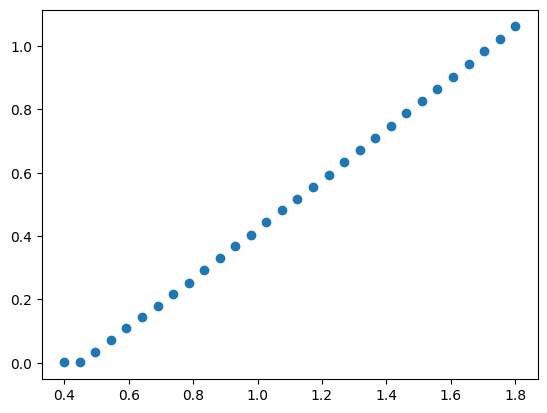

In [14]:
# plot
plt.plot(Vg,Vs,"o")
data = np.array([Vg,Vs])
np.savetxt("part4nfet.csv",data,delimiter=",")

In [ ]:
# if it looks nice in the plot, save it!

* How do you compute $\kappa$? Does it stay constant for different $V_g$?

In [ ]:
# calculate kappa

## 4.2 P-FET

* If you are not coming from 3.2 directly, you have to set the input voltage demultiplexer by sending a configuration event (make sure LED1 blinks):

**Make sure the chip receives the event by a blink of LED1, if it's not the case, the chip is dead and you must replug it.**

* set fixed voltages

In [15]:
# set bulk voltage
p.set_voltage(pyplane.DacChannel.AIN1,1.8)

1.7982406616210938

In [17]:
# set drain voltage
# set drain voltage
vd_n = 0
p.set_voltage(pyplane.DacChannel.GO22, vd_n)

0.0

In [18]:
# set trial gate and source voltages
#source
p.set_voltage(pyplane.DacChannel.GO23,1.8)
#gate
p.set_voltage(pyplane.DacChannel.AIN0,1.8)

1.7982406616210938

In [21]:
# read trial Ids
Ids_trial = p.read_current(pyplane.AdcChannel.GO21_N)
print(Ids_trial)

7.0800778573243406e-09


* Data aquisition

In [24]:
# define constants
Vdd = 1.8
max_iter = 10
N_samples = 30

What Ids target should you set? And what is the corresponding Vg?
Hint: Refer to 3.2

In [25]:
Ids_target = 6e-08
#Vg_target =

In [26]:
# initialize variables

import numpy as np
import time

Vg = np.linspace(0,Vdd,N_samples)
Vs = np.ones(N_samples) * Vdd/2

In [28]:
# sweep Vg
for n in range(N_samples):
    
    Vstep = Vdd/4
    
    # set Vg
    p.set_voltage(pyplane.DacChannel.AIN0,Vg[n])
    
    # search for Vs that gives Ids_target
    for j in range(max_iter):
        
        # set Vs
        p.set_voltage(pyplane.DacChannel.GO23,Vs[n])
        
        # wait to settle
        time.sleep(0.1)
        
        # read Ids and compute its difference with the target
        dI = p.read_current(pyplane.AdcChannel.GO21_N) - Ids_target
        
        # check for convergence
        if np.abs(dI) < Ids_target * 0.05:
            break
        
        # update Vs and step
        Vs[n] = Vs[n] - Vstep * np.sign(dI)
        Vstep = Vstep/2

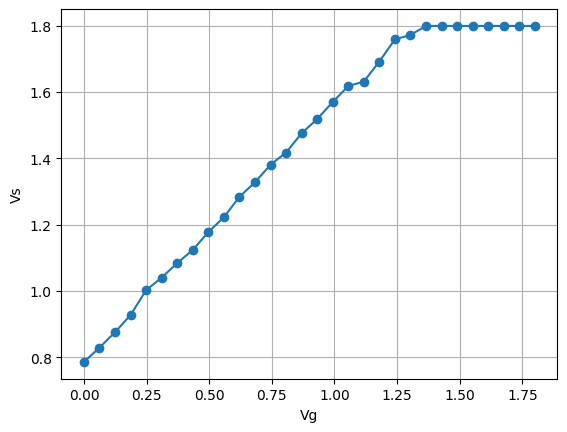

In [33]:
# plot
plt.plot(Vg,Vs,"-o")
plt.grid()
plt.xlabel("Vg")
plt.ylabel("Vs")
data = [Vg,Vs]
np.savetxt("pfet-4.csv",data,delimiter=",")

In [ ]:
# if it looks nice in the plot, save it!

* How do you compute $\kappa$? Does it stay constant for different $V_g$?

In [ ]:
# calculate kappa

# 5. Clean up

* Close you device and release memory by doing

In [ ]:
del p

* Save your changes
* Close jupyter notebook properly (`File -> Close and Halt`)
* Save the files you need for the report to your own PC

# 6. Postlab

_The answers to the postlab should be included below._

For the following questions assume an _n_-well process with the transistor in saturation.

Many differences in the properties of native and well transistors arise from the fact that the well is usually more heavily doped than the substrate.
That was certainly true in the past when people were using a single well process. 
Today, most processes are double-well or _twin-tub_ both n- and p-wells are implanted in a lightly doped epitaxially-grown p-substrate.  
_Epitaxially_ means that the layer is grown atom by atom by chemical vapor deposition, resulting in a very regular and pure crystal structure.

The classchips you are using were fabricated in a 0.18 $\mu$m process.
For an _n_-well device, the _n_-type material of the well is the bulk, while the active areas (source and drain) are _p_-type. 
The gate voltage must force all the electrons in the _n_-well away from the surface.
The resulting depletion region provides a channel for holes through enemy territory (n-well) separating the
p-type source and drain.
If the bulk is heavily doped, the gate must work harder to repel electrons.

Another way of saying this is that the capacitance of this depletion layer and the gate oxide capacitance form a _capacitive divider_ that determines how much of the gate voltage appears at the surface channel.
If the depletion layer is thin, the depletion capacitance will be large and hence the divider ratio will be unfavorable.




**(1)** How does the thickness of the depletion region depend on the doping and
on the channel (surface) potential? Assume that the doping density is uniform.


**(2)** Explain why $\kappa$ varies with the source voltage at constant current (as in the source follower).

**(3)** Is there a difference in $\kappa$ between the n- and p-type devices? Explain the reason.


**(4)** From your results in the experiments, state under what conditions
the assumption that $\kappa$ is constant is reasonable.